# Comparison of YOLO configurations
Exploration of various models, configurations and datasets for the yolo object detector.

In [1]:
# Imports (modules and files)

import sys, os, glob, math
import numpy as np
from ipywidgets import FloatProgress
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec

from PIL import Image

sys.path += [os.getcwd()]

os.environ['DYLD_LIBRARY_PATH'] = "/usr/local/cuda/lib"

%run darknet_wrapper.py

/usr/local/cuda/lib


## Classify example images
Classify a few exemplary images that are relevant for our usecase to get a first feeling for the adequacy.
Images are plotted in this notebook.

In [2]:
# Initialize classifier
# PROBLEM: IF COMPILED FOR GPU, THIS ONLY WORKS WITH THE TINY MODEL
# The large model has a memory footprint of around 4 GB
MODEL="yolov3-tiny"
net, meta = initialize_classifier(config="cfg/%s.cfg"%MODEL, weights="weights/%s.weights"%MODEL, data="cfg/coco.data")

In [3]:
%%time
# Classify Images
data_dir = "./data"
yolo_images_dir = data_dir + "/yolo_test_images"
images = os.listdir(yolo_images_dir)
f = FloatProgress(min=0, max=len(images))
display(f)
results = []
for image in images:
    image_dir = yolo_images_dir + "/" + image
    results += [detect(net, meta, image_dir)]
    f.value += 1

FloatProgress(value=0.0, max=3.0)

CPU times: user 422 ms, sys: 43 ms, total: 465 ms
Wall time: 461 ms


### Performance
Time to classify 3 images:

| Model       | CPU   | GPU           |
|-------------|-------|---------------|
| yolov3      | 72000 | Out of memory |
| yolov3-tiny | 3120  | 245           |

No handles with labels found to put in legend.


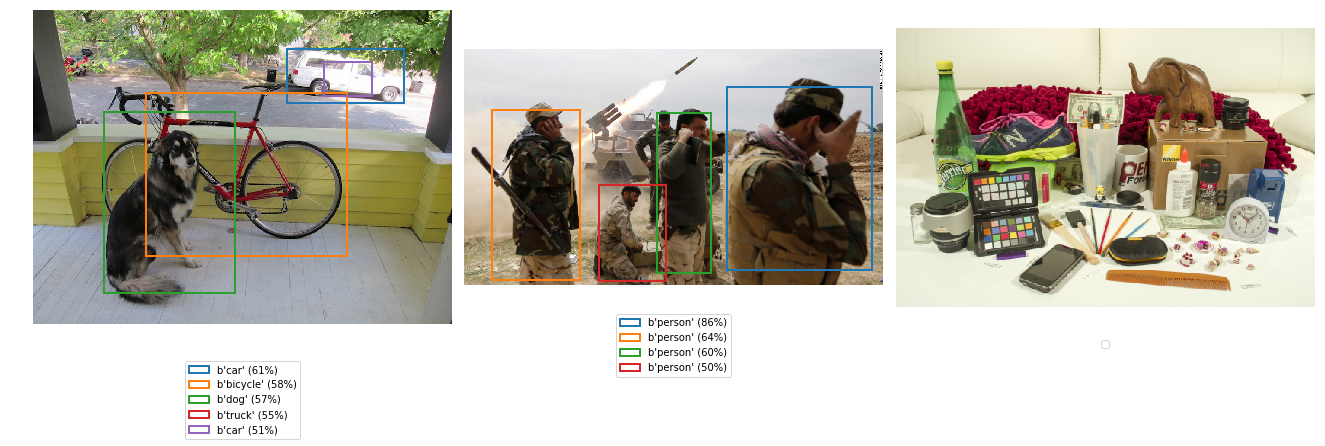

In [4]:
# Plot Results
def plot_result(ax, image, result):
    # Draw bounding boxes into the image
    im = np.array(Image.open(image), dtype=np.uint8)
    # Display the image
    ax.imshow(im)
    ax.set_axis_off()
    # Create a Rectangle patch
    index = 0
    for entity in result:
        # format is (class, probability (x,y,width, height)) ANKERED IN THE CENTER!
        width, height = entity[2][2], entity[2][3]
        x,y = entity[2][0]-(width/2), entity[2][1]-(height/2)
        rect = patches.Rectangle((x,y),width, height,
                                 linewidth=2,
                                 edgecolor='C' + str(index%10),
                                 facecolor='none',
                                 label="%s (%d%%)" % (entity[0], int(entity[1]*100)))
        ax.add_patch(rect)
        index += 1

    ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

_, axarr = plt.subplots(1, len(images), figsize=(20,20))
for ax, result, image in zip(axarr, results, images):
    image_dir = yolo_images_dir + "/" + image
    plot_result(ax, image_dir, result)
    f.value += 1
    
plt.subplots_adjust(wspace=.03, hspace=.03, left=0.01)
plt.show()